## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_125751_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (61155, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts  er   pac        lng  \
0      GCBZT02500A231213059  2024-06-24 10:20:00 NaN  6.39  114.25547   
1                       NaN                  NaN NaN   NaN        NaN   
2      GCBZT02500A231213059  2024-06-24 10:35:00 NaN  5.14  114.25547   
3                       NaN                  NaN NaN   NaN        NaN   
4                       NaN                  NaN NaN   NaN        NaN   
...                     ...                  ...  ..   ...        ...   
61150  GCBZT02500A231213059  2025-05-10 19:05:00 NaN  0.02  114.25547   
61151  GCBZT02500A231213059  2025-05-10 19:10:00 NaN  0.00  114.25547   
61152  GCBZT02500A231213059  2025-05-10 19:15:00 NaN  0.00  114.25547   
61153  GCBZT02500A231213059  2025-05-10 19:20:00 NaN  0.00  114.25547   
61154  GCBZT02500A231213059  2025-05-10 19:25:00 NaN  0.00  114.25547   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      30.237085     斜屋顶双坡   15.0             NaN                   NaN  ...   
1            NaN       NaN    NaN         27.5014               86.2382  ...   
2      30.237085     斜屋顶双坡   15.0             NaN                   NaN  ...   
3            NaN       NaN    NaN         27.6584               85.0042  ...   
4            NaN       NaN    NaN         27.7364               84.0030  ...   
...          ...       ...    ...             ...                   ...  ...   
61150  30.237085     斜屋顶双坡   15.0             NaN                   NaN  ...   
61151  30.237085     斜屋顶双坡   15.0             NaN                   NaN  ...   
61152  30.237085     斜屋顶双坡   15.0         17.4843               64.8386  ...   
61153  30.237085     斜屋顶双坡   15.0             NaN                   NaN  ...   
61154  30.237085     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                       65.7216           232.8714          1.5849   
2                           NaN                NaN             NaN   
3                       42.6463           206.2227          1.4245   
4                       25.3281           184.5920          1.4646   
...                         ...                ...             ...   
61150                       NaN                NaN             NaN   
61151                       NaN                NaN             NaN   
61152                    0.0000             1.3814          1.9790   
61153                       NaN                NaN             NaN   
61154                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1              1.9309           2.0068            166.9247   
2                 NaN              NaN                 NaN   
3              1.7351           1.8032            168.0438   
4              1.7962           1.8693            171.9396   
...               ...              ...                 ...   
61150             NaN              NaN                 NaN   
61151             NaN              NaN                 NaN   
61152          4.3540           5.0787            221.0234   
61153             NaN              NaN                 NaN   
61154             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                168.4461             169.1243  2024-06-24 10:30:00   
2                     NaN                  NaN                  NaN   
3                169.5960             170.2925  2024-06-24 10:45:00   
4                173.4140             174.0781  2024-06-24 11:00:00   
...                   ...                  ...                  ...   
61150                 NaN                  NaN                  NaN   
61151                 NaN        

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                    sn                   ts  er  \
0     2024-06-24 10:20:00  GCBZT02500A231213059  2024-06-24 10:20:00 NaN   
1     2024-06-24 10:25:00                   NaN                  NaN NaN   
2     2024-06-24 10:30:00                   NaN                  NaN NaN   
3     2024-06-24 10:35:00  GCBZT02500A231213059  2024-06-24 10:35:00 NaN   
4     2024-06-24 10:40:00                   NaN                  NaN NaN   
...                   ...                   ...                  ...  ..   
92265 2025-05-10 19:05:00  GCBZT02500A231213059  2025-05-10 19:05:00 NaN   
92266 2025-05-10 19:10:00  GCBZT02500A231213059  2025-05-10 19:10:00 NaN   
92267 2025-05-10 19:15:00  GCBZT02500A231213059  2025-05-10 19:15:00 NaN   
92268 2025-05-10 19:20:00  GCBZT02500A231213059  2025-05-10 19:20:00 NaN   
92269 2025-05-10 19:25:00  GCBZT02500A231213059  2025-05-10 19:25:00 NaN   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      6.39  114.25547  30.237085     斜屋顶双坡   15.0             NaN  ...   
1       NaN        NaN        NaN       NaN    NaN             NaN  ...   
2       NaN        NaN        NaN       NaN    NaN         27.5014  ...   
3      5.14  114.25547  30.237085     斜屋顶双坡   15.0             NaN  ...   
4       NaN        NaN        NaN       NaN    NaN             NaN  ...   
...     ...        ...        ...       ...    ...             ...  ...   
92265  0.02  114.25547  30.237085     斜屋顶双坡   15.0             NaN  ...   
92266  0.00  114.25547  30.237085     斜屋顶双坡   15.0             NaN  ...   
92267  0.00  114.25547  30.237085     斜屋顶双坡   15.0         17.4843  ...   
92268  0.00  114.25547  30.237085     斜屋顶双坡   15.0             NaN  ...   
92269  0.00  114.25547  30.237085     斜屋顶双坡   15.0             NaN  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1                   NaN                       NaN                NaN   
2               58.9486                   65.7216           232.8714   
3                   NaN                       NaN                NaN   
4                   NaN                       NaN                NaN   
...                 ...                       ...                ...   
92265               NaN                       NaN                NaN   
92266               NaN                       NaN                NaN   
92267            0.0000                    0.0000             1.3814   
92268               NaN                       NaN                NaN   
92269               NaN                       NaN                NaN   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1                 NaN             NaN              NaN                 NaN   
2              1.5849          1.9309           2.0068            166.9247   
3                 NaN             NaN              NaN                 NaN   
4                 NaN             NaN              NaN                 NaN   
...               ...             ...              ...                 ...   
92265             NaN             NaN              NaN                 NaN   
92266             NaN             NaN              NaN                 NaN   
92267          1.9790          4.3540           5.0787            221.0234   
92268             NaN             NaN              NaN                 NaN   
92269             NaN             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1                     NaN                  NaN                  NaN  
2                168.4461             169.1243  2024-06-24 10:30:00  
3                     NaN                  NaN                  NaN  
4                     NaN                  NaN    

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    1,     2,     4,     5,     6,     7,     8,     9,    10,    11,
        ...
        92095, 92096, 92097, 92098, 92099, 92100, 92101, 92102, 92103, 92249],
       dtype='int64', length=46677),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    1,     2,     4,     5,     6,     7,     8,     9,    10,    11,
        ...
        92095, 92096, 92097, 92098, 92099, 92100, 92101, 92102, 92103, 92249],
       dtype='int64', length=46677),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(RangeIndex(start=0, stop=92270, step=1), True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    1,     2,     4,     5,     6,     7,     8,     9,    10,    11,
        ...
        92095, 92096, 92097, 92098, 92099, 92100, 92101, 92102, 92103, 92249],
       dtype='int64', length=46677),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    1,     2,     4,     5,     6,     7,     8,     9,    10,    11,
        ...
        92095, 92096, 92097, 92098, 92099, 92100, 92101, 92102, 92103, 92249],
       dtype='int64', length=46677),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    0,     1,     3,     4,     6,     7,     9,    10,    12,    13,
        ...
        92256, 92257, 92259, 92260, 92262, 92263, 92265, 92266, 92268, 92269],
       dtype='int64', length=61514),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                    sn                   ts   er  \
0     2024-06-24 10:20:00  GCBZT02500A231213059  2024-06-24 10:20:00  0.0   
1     2024-06-24 10:25:00  GCBZT02500A231213059  2024-06-24 10:25:00  0.0   
2     2024-06-24 10:30:00  GCBZT02500A231213059  2024-06-24 10:30:00  0.0   
3     2024-06-24 10:35:00  GCBZT02500A231213059  2024-06-24 10:35:00  0.0   
4     2024-06-24 10:40:00  GCBZT02500A231213059  2024-06-24 10:40:00  0.0   
...                   ...                   ...                  ...  ...   
92265 2025-05-10 19:05:00  GCBZT02500A231213059  2025-05-10 19:05:00  0.0   
92266 2025-05-10 19:10:00  GCBZT02500A231213059  2025-05-10 19:10:00  0.0   
92267 2025-05-10 19:15:00  GCBZT02500A231213059  2025-05-10 19:15:00  0.0   
92268 2025-05-10 19:20:00  GCBZT02500A231213059  2025-05-10 19:20:00  0.0   
92269 2025-05-10 19:25:00  GCBZT02500A231213059  2025-05-10 19:25:00  0.0   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      6.39  114.25547  30.237085     斜屋顶双坡   15.0             NaN  ...   
1      0.00  114.25547  30.237085     斜屋顶双坡   15.0             NaN  ...   
2      0.00  114.25547  30.237085     斜屋顶双坡   15.0       27.501400  ...   
3      5.14  114.25547  30.237085     斜屋顶双坡   15.0       27.553733  ...   
4      0.00  114.25547  30.237085     斜屋顶双坡   15.0       27.606067  ...   
...     ...        ...        ...       ...    ...             ...  ...   
92265  0.02  114.25547  30.237085     斜屋顶双坡   15.0       17.703500  ...   
92266  0.00  114.25547  30.237085     斜屋顶双坡   15.0       17.593900  ...   
92267  0.00  114.25547  30.237085     斜屋顶双坡   15.0       17.484300  ...   
92268  0.00  114.25547  30.237085     斜屋顶双坡   15.0       17.484300  ...   
92269  0.00  114.25547  30.237085     斜屋顶双坡   15.0       17.484300  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1                   NaN                       NaN                NaN   
2               58.9486                 65.721600         232.871400   
3               52.1281                 58.029833         223.988500   
4               45.3076                 50.338067         215.105600   
...                 ...                       ...                ...   
92265            0.0000                  0.000000           3.223267   
92266            0.0000                  0.000000           2.302333   
92267            0.0000                  0.000000           1.381400   
92268            0.0000                  0.000000           1.381400   
92269            0.0000                  0.000000           1.381400   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1                 NaN             NaN              NaN                 NaN   
2            1.584900        1.930900         2.006800          166.924700   
3            1.531433        1.865633         1.938933          167.297733   
4            1.477967        1.800367         1.871067          167.670767   
...               ...             ...              ...                 ...   
92265        1.991800        4.318600         5.024033          221.880467   
92266        1.985400        4.336300         5.051367          221.451933   
92267        1.979000        4.354000         5.078700          221.023400   
92268        1.979000        4.354000         5.078700          221.023400   
92269        1.979000        4.354000         5.078700          221.023400   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1                     NaN                  NaN                  NaN  
2              168.446100             169.1243  2024-06-24 10:30:00  
3              168.829400             169.5137                  NaN  
4              169.212700             

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0, 1], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=92270, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                    sn  \
ts                                                              
2024-06-24 10:20:00 2024-06-24 10:20:00  GCBZT02500A231213059   
2024-06-24 10:25:00 2024-06-24 10:25:00  GCBZT02500A231213059   
2024-06-24 10:30:00 2024-06-24 10:30:00  GCBZT02500A231213059   
2024-06-24 10:35:00 2024-06-24 10:35:00  GCBZT02500A231213059   
2024-06-24 10:40:00 2024-06-24 10:40:00  GCBZT02500A231213059   
...                                 ...                   ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A231213059   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A231213059   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A231213059   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A231213059   
2025-05-10 19:25:00 2025-05-10 19:25:00  GCBZT02500A231213059   

                                     ts   er   pac        lng        lat  \
ts                                                                         
2024-06-24 10:20:00 2024-06-24 10:20:00  0.0  6.39  114.25547  30.237085   
2024-06-24 10:25:00 2024-06-24 10:25:00  0.0  0.00  114.25547  30.237085   
2024-06-24 10:30:00 2024-06-24 10:30:00  0.0  0.00  114.25547  30.237085   
2024-06-24 10:35:00 2024-06-24 10:35:00  0.0  5.14  114.25547  30.237085   
2024-06-24 10:40:00 2024-06-24 10:40:00  0.0  0.00  114.25547  30.237085   
...                                 ...  ...   ...        ...        ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.02  114.25547  30.237085   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.25547  30.237085   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.25547  30.237085   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.25547  30.237085   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.25547  30.237085   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-06-24 10:20:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-06-24 10:25:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-06-24 10:30:00     斜屋顶双坡   15.0       27.501400  ...           58.9486   
2024-06-24 10:35:00     斜屋顶双坡   15.0       27.553733  ...           52.1281   
2024-06-24 10:40:00     斜屋顶双坡   15.0       27.606067  ...           45.3076   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.703500  ...            0.0000   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.593900  ...            0.0000   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.484300  ...            0.0000   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.484300  ...            0.0000   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.484300  ...            0.0000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-06-24 10:20:00                       NaN                NaN   
2024-06-24 10:25:00                       NaN                NaN   
2024-06-24 10:30:00                 65.721600         232.871400   
2024-06-24 10:35:00                 58.029833         223.988500   
2024-06-24 10:40:00                 50.338067         215.105600   
...                                       ...                ...   
2025-05-10 19:05:00                  0.000000           3.223267   
2025-05-10 19:10:00                  0.000000           2.302333   
2025-05-10 19:15:00                  0.000000           1.381400   
2025-05-10 19:20:00                  0.000000           1.381400   
2025-05-10 19:25:00                  0.000000           1.381400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-06-24 10:20:00             NaN             NaN              NaN   
2024-06-24 10:25:00             NaN             NaN              N

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                    sn  \
2024-06-24 10:20:00 2024-06-24 10:20:00  GCBZT02500A231213059   
2024-06-24 10:25:00 2024-06-24 10:25:00  GCBZT02500A231213059   
2024-06-24 10:30:00 2024-06-24 10:30:00  GCBZT02500A231213059   
2024-06-24 10:35:00 2024-06-24 10:35:00  GCBZT02500A231213059   
2024-06-24 10:40:00 2024-06-24 10:40:00  GCBZT02500A231213059   
...                                 ...                   ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A231213059   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A231213059   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A231213059   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A231213059   
2025-05-10 19:25:00 2025-05-10 19:25:00  GCBZT02500A231213059   

                                     ts   er   pac        lng        lat  \
2024-06-24 10:20:00 2024-06-24 10:20:00  0.0  6.39  114.25547  30.237085   
2024-06-24 10:25:00 2024-06-24 10:25:00  0.0  0.00  114.25547  30.237085   
2024-06-24 10:30:00 2024-06-24 10:30:00  0.0  0.00  114.25547  30.237085   
2024-06-24 10:35:00 2024-06-24 10:35:00  0.0  5.14  114.25547  30.237085   
2024-06-24 10:40:00 2024-06-24 10:40:00  0.0  0.00  114.25547  30.237085   
...                                 ...  ...   ...        ...        ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.02  114.25547  30.237085   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.25547  30.237085   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.25547  30.237085   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.25547  30.237085   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.25547  30.237085   

                    roof_type  angle  temperature_2m  ...  \
2024-06-24 10:20:00     斜屋顶双坡   15.0             NaN  ...   
2024-06-24 10:25:00     斜屋顶双坡   15.0             NaN  ...   
2024-06-24 10:30:00     斜屋顶双坡   15.0       27.501400  ...   
2024-06-24 10:35:00     斜屋顶双坡   15.0       27.553733  ...   
2024-06-24 10:40:00     斜屋顶双坡   15.0       27.606067  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.703500  ...   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.593900  ...   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.484300  ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.484300  ...   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.484300  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-06-24 10:20:00                       NaN                NaN   
2024-06-24 10:25:00                       NaN                NaN   
2024-06-24 10:30:00                 65.721600         232.871400   
2024-06-24 10:35:00                 58.029833         223.988500   
2024-06-24 10:40:00                 50.338067         215.105600   
...                                       ...                ...   
2025-05-10 19:05:00                  0.000000           3.223267   
2025-05-10 19:10:00                  0.000000           2.302333   
2025-05-10 19:15:00                  0.000000           1.381400   
2025-05-10 19:20:00                  0.000000           1.381400   
2025-05-10 19:25:00                  0.000000           1.381400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-06-24 10:20:00             NaN             NaN              NaN   
2024-06-24 10:25:00             NaN             NaN              NaN   
2024-06-24 10:30:00        1.584900        1.930900         2.006800   
2024-06-24 10:35:00        1.531433        1.865633         1.938933   
2024-06-24 10:40:00        1.477967        1.800367         1.871067   
...                             ...             ...              ...   
2025-05-10 19:05:00        1.991800        4.318600         5.024033   
2025-05-10 19:10:00        1.985400        4.336300         5.051367   
2025-05-10 19:15:00        1.979000        4.354000         5.078700   
2025-05-10 19:20:00        1.979000        4.354000         5.0787

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-06-24 10:20:00', '2024-06-24 10:25:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(92270, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    18.098475
1        relative_humidity_2m    68.383196
2                dew_point_2m    11.683012
3                pressure_msl  1016.302101
4            surface_pressure  1013.680983
5   precipitation_probability    10.763274
6                 cloud_cover    55.401185
7             cloud_cover_low    12.440496
8             cloud_cover_mid    30.175247
9            cloud_cover_high    34.665479
10        shortwave_radiation   162.285743
11           direct_radiation    94.066237
12   direct_normal_irradiance   149.221033
13          diffuse_radiation    68.219506
14             wind_speed_10m     2.593547
15             wind_speed_80m     4.258096
16            wind_speed_120m     4.722176
17         wind_direction_10m   140.485853
18         wind_direction_80m   140.899925
19        wind_direction_120m   140.815046
20                   pac_copy    -8.478980

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m  9.955352e+01
1        relative_humidity_2m  3.363973e+02
2                dew_point_2m  1.047019e+02
3                pressure_msl  1.067026e+02
4            surface_pressure  1.045431e+02
5   precipitation_probability  8.131919e+02
6                 cloud_cover  1.824065e+03
7             cloud_cover_low  7.695465e+02
8             cloud_cover_mid  1.596584e+03
9            cloud_cover_high  1.722818e+03
10        shortwave_radiation  5.551248e+04
11           direct_radiation  2.791808e+04
12   direct_normal_irradiance  5.286508e+04
13          diffuse_radiation  7.710188e+03
14             wind_speed_10m  2.125612e+00
15             wind_speed_80m  4.454828e+00
16            wind_speed_120m  5.358708e+00
17         wind_direction_10m  1.016496e+04
18         wind_direction_80m  9.904991e+03
19        wind_direction_120m  9.808243e+03
20                   pac_copy  1.128588e+07

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            9.977651
1        relative_humidity_2m           18.341138
2                dew_point_2m           10.232393
3                pressure_msl           10.329695
4            surface_pressure           10.224633
5   precipitation_probability           28.516520
6                 cloud_cover           42.709071
7             cloud_cover_low           27.740701
8             cloud_cover_mid           39.957273
9            cloud_cover_high           41.506838
10        shortwave_radiation          235.610869
11           direct_radiation          167.087052
12   direct_normal_irradiance          229.924075
13          diffuse_radiation           87.807677
14             wind_speed_10m            1.457948
15             wind_speed_80m            2.110646
16            wind_speed_120m            2.314888
17         wind_direction_10m          100.821412
18         wind_direction_80m           99.523821
19        wind_direction_120m           99.036575
20                   pac_copy         3359.445827

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    39.2690
1        relative_humidity_2m    99.9395
2                dew_point_2m    28.0301
3                pressure_msl  1040.8709
4            surface_pressure  1038.0519
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   898.0712
11           direct_radiation   736.8413
12   direct_normal_irradiance   790.5842
13          diffuse_radiation   400.4993
14             wind_speed_10m    10.1411
15             wind_speed_80m    15.4495
16            wind_speed_120m    16.7713
17         wind_direction_10m   358.3642
18         wind_direction_80m   358.3874
19        wind_direction_120m   358.1824
20                   pac_copy    22.3800

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature     min value
0              temperature_2m -3.900700e+00
1        relative_humidity_2m  1.488480e+01
2                dew_point_2m -1.713300e+01
3                pressure_msl  9.914371e+02
4            surface_pressure  9.890139e+02
5   precipitation_probability  0.000000e+00
6                 cloud_cover  0.000000e+00
7             cloud_cover_low  0.000000e+00
8             cloud_cover_mid  0.000000e+00
9            cloud_cover_high  0.000000e+00
10        shortwave_radiation  0.000000e+00
11           direct_radiation  0.000000e+00
12   direct_normal_irradiance  0.000000e+00
13          diffuse_radiation  0.000000e+00
14             wind_speed_10m  4.910000e-02
15             wind_speed_80m  2.129000e-01
16            wind_speed_120m  2.682000e-01
17         wind_direction_10m  2.003000e+00
18         wind_direction_80m  1.197200e+00
19        wind_direction_120m  1.719800e+00
20                   pac_copy -1.020461e+06

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    18.284500
1        relative_humidity_2m    70.448550
2                dew_point_2m    12.367717
3                pressure_msl  1017.210750
4            surface_pressure  1014.581483
5   precipitation_probability     0.000000
6                 cloud_cover    67.404567
7             cloud_cover_low     0.003500
8             cloud_cover_mid     4.908133
9            cloud_cover_high     6.291050
10        shortwave_radiation    13.256650
11           direct_radiation     0.720133
12   direct_normal_irradiance     3.176817
13          diffuse_radiation    10.456467
14             wind_speed_10m     2.259700
15             wind_speed_80m     4.005833
16            wind_speed_120m     4.479667
17         wind_direction_10m   112.889833
18         wind_direction_80m   115.698517
19        wind_direction_120m   116.049300
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       12.068267             60.170767      5.856744   1010.011356   
0.666667       23.880556             78.876522     17.464533   1022.559956   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1007.476889                        0.0    16.360989   
0.666667       1019.859667                        0.0    97.726222   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000         0.012400          0.002400  ...   
0.666667         1.877389        28.344578         54.411578  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         33.776756                 98.872822          96.815044   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        1.813878        3.100900         3.446356           76.408500   
0.666667        2.916633        4.971478         5.587733          191.124833   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           78.801044            79.300344      0.00  
0.666667          192.598478           193.296511      1.65  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.091618      0.897035   
relative_humidity_2m            -0.091618              1.000000      0.351648   
dew_point_2m                     0.897035              0.351648      1.000000   
pressure_msl                    -0.876538             -0.165950     -0.893583   
surface_pressure                -0.874497             -0.167997     -0.892562   
precipitation_probability        0.026200              0.320000      0.154984   
cloud_cover                      0.007529              0.128840      0.064920   
cloud_cover_low                 -0.106910              0.294418      0.021358   
cloud_cover_mid                 -0.247580              0.108907     -0.182122   
cloud_cover_high                 0.240792              0.082951      0.260430   
shortwave_radiation              0.366563             -0.464217      0.131541   
direct_radiation                 0.351795             -0.454693      0.119955   
direct_normal_irradiance         0.297143             -0.487593      0.051894   
diffuse_radiation                0.314162             -0.380392      0.124699   
wind_speed_10m                   0.241741             -0.204919      0.138216   
wind_speed_80m                   0.125274             -0.065732      0.095158   
wind_speed_120m                  0.095610             -0.033367      0.082536   
wind_direction_10m               0.066873              0.096650      0.096122   
wind_direction_80m               0.076239              0.087752      0.101435   
wind_direction_120m              0.078053              0.084509      0.101496   
pac_copy                        -0.003702             -0.001276     -0.004175   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.876538         -0.874497   
relative_humidity_2m          -0.165950         -0.167997   
dew_point_2m                  -0.893583         -0.892562   
pressure_msl                   1.000000          0.999991   
surface_pressure               0.999991          1.000000   
precipitation_probability     -0.126830         -0.127555   
cloud_cover                   -0.056856         -0.057177   
cloud_cover_low                0.051833          0.051332   
cloud_cover_mid                0.198140          0.197554   
cloud_cover_high              -0.287842         -0.287917   
shortwave_radiation           -0.135276         -0.133147   
direct_radiation              -0.128144         -0.126102   
direct_normal_irradiance      -0.070510         -0.068495   
diffuse_radiation             -0.119141         -0.117311   
wind_speed_10m                -0.158602         -0.157706   
wind_speed_80m                -0.129300         -0.129196   
wind_speed_120m               -0.119550         -0.119630   
wind_direction_10m            -0.124303         -0.124681   
wind_direction_80m            -0.142913         -0.143349   
wind_direction_120m           -0.146188         -0.146634   
pac_copy                       0.001762          0.001744   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.026200     0.007529   
relative_humidity_2m                        0.320000     0.128840   
dew_point_2m                                0.154984     0.064920   
pressure_msl                               -0.126830    -0.056856   
surface_pressure                           -0.127555    -0.057177   
precipitation_probability                   1.000000     0.326683   
cloud_cover                                 0.326683     1.000000   
cloud_cover_low                             0.405897     0.371946   
cloud_cover_mid                             0.410470     0.640569   
cloud_cover_high                            0.210386     0.673570   
shortwave_radiation                        -0.070936    -0.128539   
direct_radiation                           -0.110261    -0.242401   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.869964
1        relative_humidity_2m          0.150204
2                dew_point_2m          0.971847
3                pressure_msl          0.972160
4            surface_pressure          0.972059
5   precipitation_probability          0.378858
6                 cloud_cover          0.544233
7             cloud_cover_low          0.592005
8             cloud_cover_mid          0.586104
9            cloud_cover_high          0.520613
10        shortwave_radiation         -0.335667
11           direct_radiation         -0.235087
12   direct_normal_irradiance         -0.214485
13          diffuse_radiation         -0.381264
14             wind_speed_10m          0.554174
15             wind_speed_80m          0.577272
16            wind_speed_120m          0.547382
17         wind_direction_10m          0.392264
18         wind_direction_80m          0.426545
19        wind_direction_120m          0.436806
20                   pac_copy         -0.000011

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([1039335.31976728, 1054085.09865552, 1081589.77996798]),
 'fft_periods': array([287, 290, 143])}

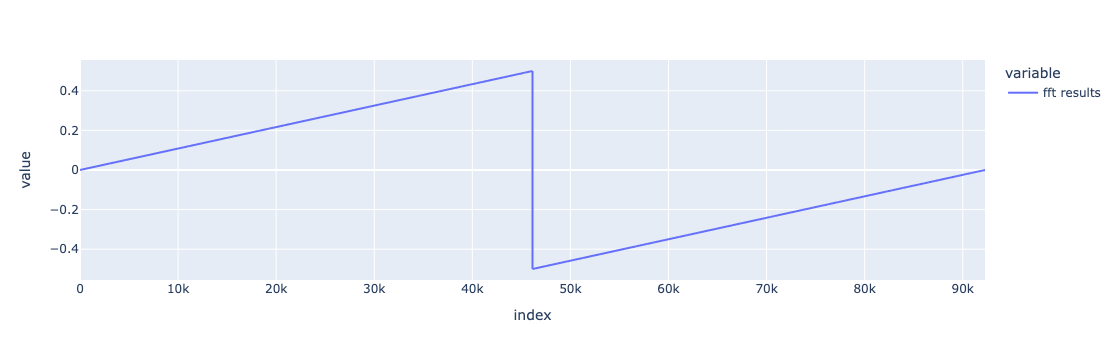

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -303.75821396849074,
  'P-value': 0.0,
  'Lags': np.int64(0),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic               -303.758
  P-value                         0.000
  Lags                                0
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-303.7582557878282),
  'P-value': 0.0,
  'Lags': 67,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic               -303.758
  P-value                         0.000
  Lags                               67
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -303.7539161742964,
  'P-value': 0.0,
  'Lags': np.int64(0),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic               -303.754
  P-value                         0.000
  Lags                                0
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}